In [1]:
import numpy as np 
import pandas as pd 
import numpy as np 
import pandas as pd
import xarray as xr
import openpyxl
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import *
import matplotlib.colors as colors
from scipy import stats 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [2]:
## Model MAR
sourceDataGrid='/home/amoryc/'
#fileName_grF='NST.2000.01.01.00.GRa_Fedchenko.nc'
fileName_grM='NST.2000.01.01.00.GRa_Mera.nc_ICEmask'
dsM= xr.open_dataset(sourceDataGrid+fileName_grM)

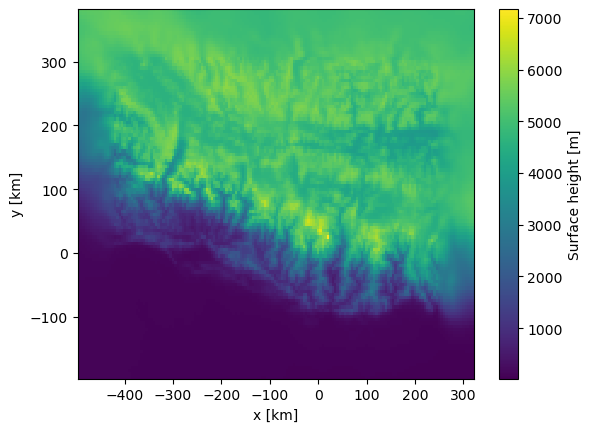

In [3]:


dsM.SH.plot()



In [4]:


from pyproj import Transformer
# Define UTM Zone 45N -> WGS84
transformer = Transformer.from_crs("epsg:32645", "epsg:4326", always_xy=True)

# Input coordinates in UTM
eastingMN = 489885
northingMN = 3065938
# Transform to lon/lat
lonMN, latMN = transformer.transform(eastingMN, northingMN)
print(f"Latitude: {latMN:.6f}, Longitude: {lonMN:.6f}")

# Input coordinates in UTM
eastingCH = 478315
northingCH = 3095379

lon_Changri=86.77948450
lat_Changri=27.98336311
elev_Changri=5360

## MERALA
lon_MeraLA=86.900
lat_MeraLA=27.735
elev_MeraLA=5352.008
target_lon = lon_MeraLA
target_lat = lat_MeraLA

## KHARE
lon_Khare=86.8776142768303
lat_Khare=27.74424682282522
target_lon = lon_Khare
target_lat = lat_Khare

##PHERICHE
lon_Pheriche=86.81972903284355
lat_Pheriche=27.895048949594884
target_lon = lon_Pheriche
target_lat = lat_Pheriche

## PYRAMID
lon_Pyramide=86.81296905961787
lat_Pyramide=27.957821815535848
target_lon = lon_Pyramide
target_lat = lat_Pyramide


# Input coordinates in UTM
eastingMS = 487553.653
northingMS = 3064704.231
# Transform to lon/lat
lonMS, latMS = transformer.transform(eastingMS, northingMS)
print(f"Latitude: {latMS:.6f}, Longitude: {lonMS:.6f}")

# Input coordinates in UTM
eastingMC = 488409.424
northingMC = 3066148.049
# Transform to lon/lat
lonMC, latMC = transformer.transform(eastingMC, northingMC)
print(f"LatitudeMC: {latMC:.6f}, Longitude: {lonMC:.6f}")



Latitude: 27.717723, Longitude: 86.897390
Latitude: 27.706566, Longitude: 86.873753
LatitudeMC: 27.719608, Longitude: 86.882420


In [15]:
#Step 2: Find the nearest grid point to target_lon,target_lat#Step 2: Find the nearest grid point to target_lon,target_lat
lon=dsM.LON;lat=dsM.LAT


# Compute distance to each grid point
dist = np.sqrt((lon - target_lon)**2 + (lat - target_lat)**2)
j, i = np.unravel_index(dist.argmin(), dist.shape)

# Compute distance to each grid point
distMS = np.sqrt((lon - lonMS)**2 + (lat - latMS)**2)
jMS, iMS = np.unravel_index(distMS.argmin(), distMS.shape)

# Compute distance to each grid point
distMN = np.sqrt((lon - lonMN)**2 + (lat - latMN)**2)
jMN, iMN = np.unravel_index(distMN.argmin(), distMN.shape)

# Compute distance to each grid point
distML = np.sqrt((lon - lon_MeraLA)**2 + (lat - lat_MeraLA)**2)
jML, iML = np.unravel_index(distML.argmin(), distML.shape)

# Compute distance to each grid point
distCH = np.sqrt((lon - lon_Changri)**2 + (lat - lat_Changri)**2)
jCH, iCH = np.unravel_index(distCH.argmin(), distCH.shape)

# Compute distance to each grid point
distKH = np.sqrt((lon - lon_Khare)**2 + (lat - lat_Khare)**2)
jKH, iKH = np.unravel_index(distKH.argmin(), distKH.shape)


# Compute distance to each grid point
distPH = np.sqrt((lon - lon_Pheriche)**2 + (lat - lat_Pheriche)**2)
jPH, iPH = np.unravel_index(distPH.argmin(), distPH.shape)


# Compute distance to each grid point
distPY = np.sqrt((lon - lon_Pyramide)**2 + (lat - lat_Pyramide)**2)
jPY, iPY = np.unravel_index(distPY.argmin(), distPY.shape)






In [17]:


print(jMS, iMS)
print(jMN, iMN)
print(jML, iML)
print(jCH, iCH)
print(jPY, iPY)
print(jKH, iKH)
print(jPH, iPH)

39 98
39 99
40 99
45 97
45 97
40 99
43 97


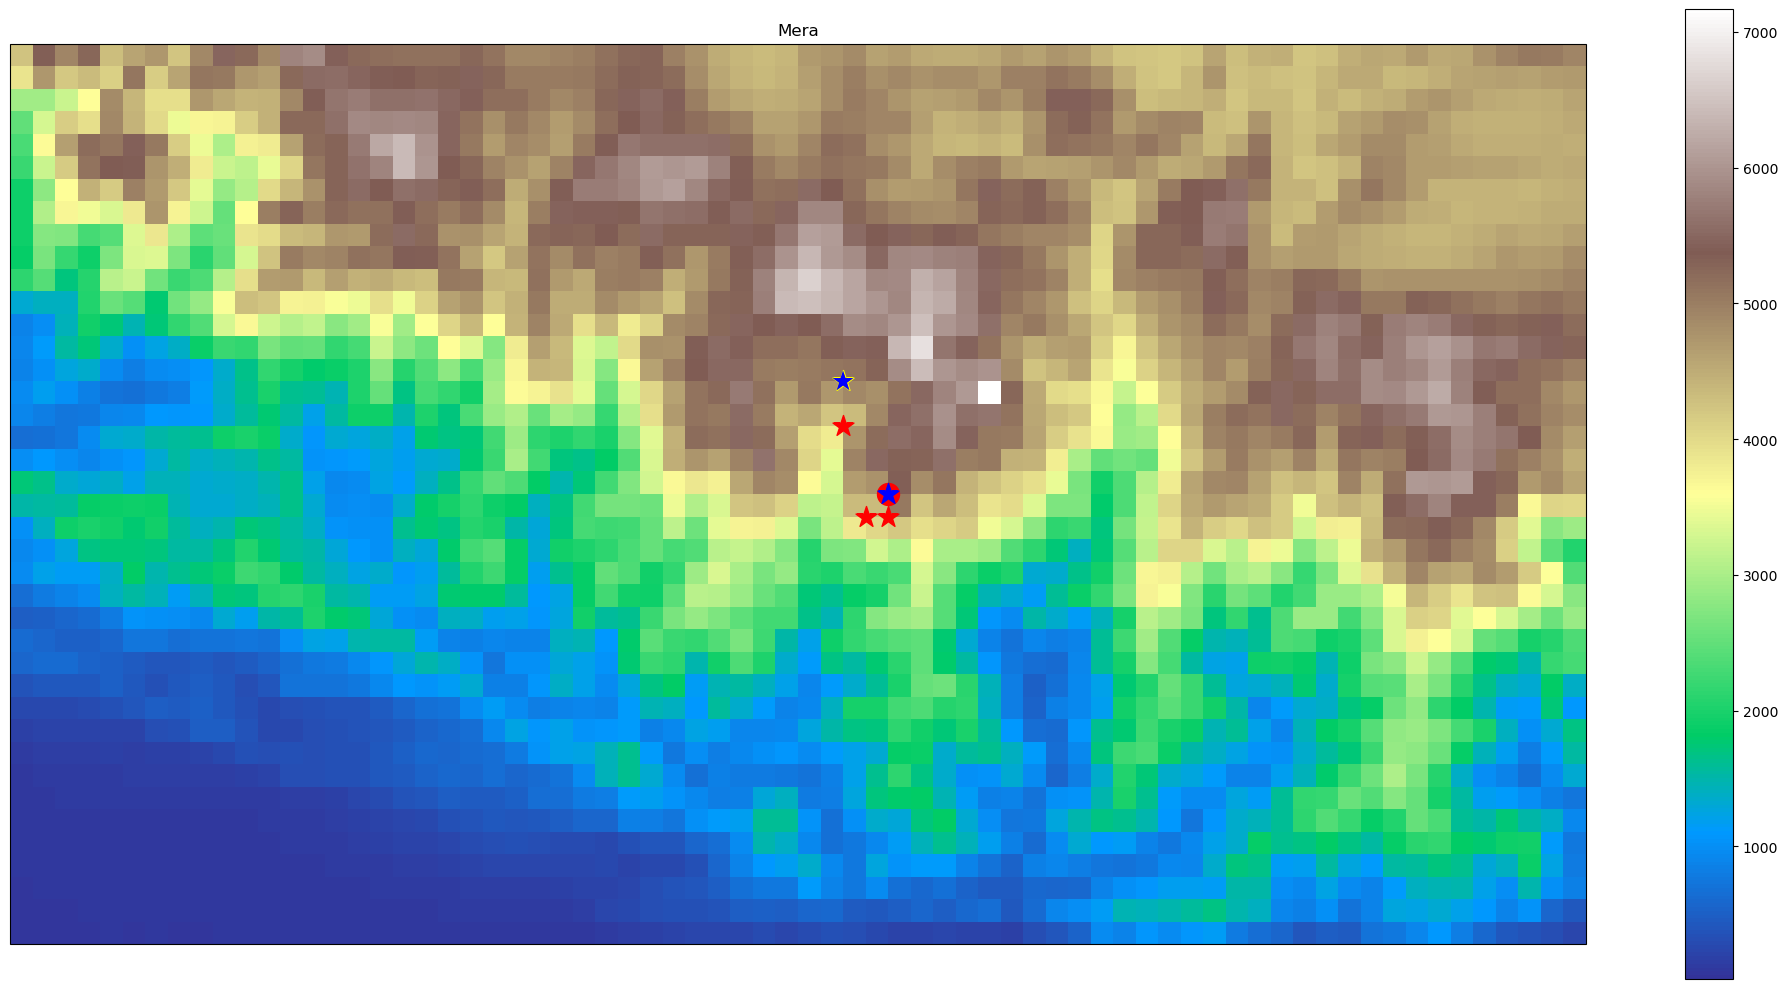

In [23]:
fig, axs = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,10))
cmap='terrain'

m1=axs.pcolormesh(dsM.SH,cmap=cmap)

axs.scatter(iMS,jMS,s=250,marker='*',color='red',linewidths=1.,edgecolors='red')

axs.scatter(iMN,jMN,s=250,marker='*',color='red',linewidths=1.,edgecolors='red')

axs.scatter(iCH,jCH,s=250,marker='*',color='red',linewidths=1.,edgecolors='yellow') #vérifier si coordonées sont dans le bon référenciel.

axs.scatter(iPY,jPY,s=250,marker='*',color='blue',linewidths=1.,edgecolors='None') #vérifier si coordonées sont dans le bon référenciel.

axs.scatter(iPH,jPH,s=250,marker='*',color='red',linewidths=1.,edgecolors='red') #vérifier si coordonées sont dans le bon référenciel.

axs.scatter(iKH,jKH,s=250,marker='o',color='red',linewidths=1.,edgecolors='red') #vérifier si coordonées sont dans le bon référenciel.

axs.scatter(iML,jML,s=250,marker='*',color='blue',linewidths=1.,edgecolors='blue')





axs.set_title('Mera')
fig.colorbar(m1,orientation='vertical')

axs.set_extent([60, 130, 60, 20], crs=ccrs.PlateCarree())

#ax1.set_title('contourf with levels')
fig.tight_layout()
plt.grid()
plt.show()